Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/复现ju2024a/density0011.sdf
t() = time
x(1501, 1001, 1001) = grid
y(1501, 1001, 1001) = grid
z(1501, 1001, 1001) = grid
xc(1500, 1000, 1000) = grid_mid
yc(1500, 1000, 1000) = grid_mid
zc(1500, 1000, 1000) = grid_mid
Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 1,  7, 20]
Derived_Average_Particle_Energy_Electron <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Average_Particle_Energy_Ion_H <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Average_Particle_Energy_Photon <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Number_Density_Electron <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Number_Density_Ion_H <class 'sdf.BlockPlainVariable'> [150

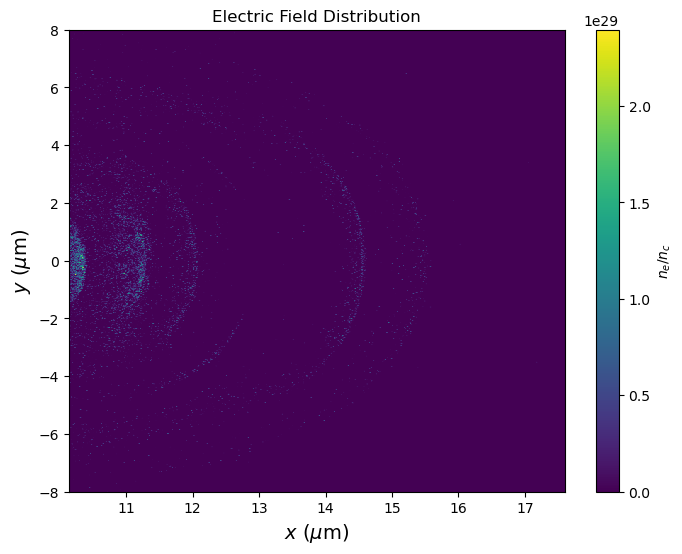

In [2]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

# # 设定数据文件的路径和文件名模式  
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/复现ju2024a'
file_prefix = 'density'  
file_suffix = '.sdf'

file_index =  11

file_name = f"{file_prefix}{file_index:04d}{file_suffix}"  
file_path = os.path.join(base_path, file_name)

# 读取数据
den_crit =  0.1
Density_Data = sh.getdata(file_path)
sh.list_variables(Density_Data)

ne = Density_Data.Derived_Number_Density_Electron.data/den_crit

x = Density_Data.Grid_Grid_mid.data[0]/(1e-6 ) # 归一化
y = Density_Data.Grid_Grid_mid.data[1]/(1e-6 )
z = Density_Data.Grid_Grid_mid.data[2]/(1e-6 )

# 切片
x_indices = slice(800, ne.shape[0])
x_values = x[x_indices] 
y_indices = slice(0, ne.shape[1]) 
y_values = y[y_indices]
ne_slice = ne[x_indices, y_indices,250]

X, Y = np.meshgrid(x_values, y_values, indexing='ij')

# 创建图像和子图
fig, ax = plt.subplots(figsize=(8, 6))

# 显示电场图
c = ax.pcolormesh(X, Y, ne_slice, shading='auto')

# 添加颜色条
cbar = plt.colorbar(c, ax=ax, label='$n_e / n_c$')

# 设置标签和标题
ax.set_xlabel(r'$x$ ($\mu$m)', fontsize=14)
ax.set_ylabel(r'$y$ ($\mu$m)', fontsize=14)
ax.set_title('Electric Field Distribution')

plt.show()